## Required Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import os
import torchvision
import torchvision.transforms.functional as TF
import random

In [63]:
import sys
sys.path.append('../src/')
import preprocess
#import json2mask
import constant
from model import Unet

## PARAMETERS

In [64]:
VALID_SIZE = 0.3
TEST_SIZE  = 0.1
BATCH_SIZE = 4
EPOCHS = 20
CUDA = False
INPUT_SHAPE = (224, 224)
N_CLASSES = 2

## DIRECTORIES

In [65]:
SRC_DIR=os.getcwd()
ROOT_DIR=os.path.join(SRC_DIR,'..')
IMAGE_DIR=os.path.join(ROOT_DIR,'images')
MASK_DIR=os.path.join(ROOT_DIR,"masks")

In [66]:
ROOT_DIR='C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\'

In [67]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [68]:
image_paths=os.listdir('C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images')
mask_paths=os.listdir('C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks')
line_mask_paths=os.listdir('C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks')

In [69]:
for i in range(len(image_paths)):
    image_paths[i]=ROOT_DIR+"images\\"+image_paths[i]

In [70]:
for i in range(len(line_mask_paths)):
    line_mask_paths[i]=ROOT_DIR+"line_masks\\"+line_mask_paths[i]

In [71]:
image_paths

['C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002387.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002403.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002411.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002419.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002427.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002435.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002443.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\images\\cfcu_002451.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internsh

In [72]:
mask_paths

['cfcu_002387.png',
 'cfcu_002403.png',
 'cfcu_002411.png',
 'cfcu_002419.png',
 'cfcu_002427.png',
 'cfcu_002435.png',
 'cfcu_002443.png',
 'cfcu_002451.png',
 'cfcu_002459.png',
 'cfcu_002467.png',
 'cfcu_002475.png',
 'cfcu_002483.png',
 'cfcu_002491.png',
 'cfcu_002499.png']

In [73]:
line_mask_paths

['C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002387.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002403.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002411.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002419.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002427.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002435.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002443.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\line_masks\\cfcu_002451.png',
 'C:\\Users\\Beytullah\\Documents\\GitHu

## Json2Mask

In [74]:
for i in range(len(image_paths)):
    mask_paths[i]=ROOT_DIR+"masks\\"+mask_paths[i]

In [75]:
mask=plt.imread(mask_paths[0])

In [76]:
mask_paths

['C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002387.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002403.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002411.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002419.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002427.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002435.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002443.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Project\\data\\masks\\cfcu_002451.png',
 'C:\\Users\\Beytullah\\Documents\\GitHub\\FordOtosan-L4Highway-Internship-Proje

In [77]:
def visualize_example_fs_mask_pair(image_paths,mask_paths):
    random_idx=random.randint(0,len(image_paths))
    image=plt.imread(image_paths[random_idx])
    mask=plt.imread(mask_paths[random_idx])
    
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
    axs[0].imshow(image)
    axs[0].set_title('Image')
    axs[1].imshow(mask)
    axs[1].set_title('Mask')
    
    

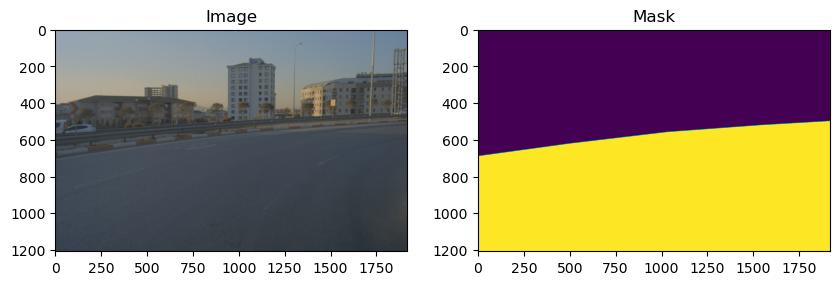

In [78]:
visualize_example_fs_mask_pair(image_paths,mask_paths)

In [83]:
def visualize_example_line_mask_pair(image_paths,line_mask_paths):
    random_idx=random.randint(0,len(image_paths))
    image=plt.imread(image_paths[random_idx])
    mask=plt.imread(line_mask_paths[random_idx])
    
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
    axs[0].imshow(image)
    axs[0].set_title('Image')
    axs[1].imshow(mask)
    axs[1].set_title('Mask')
    

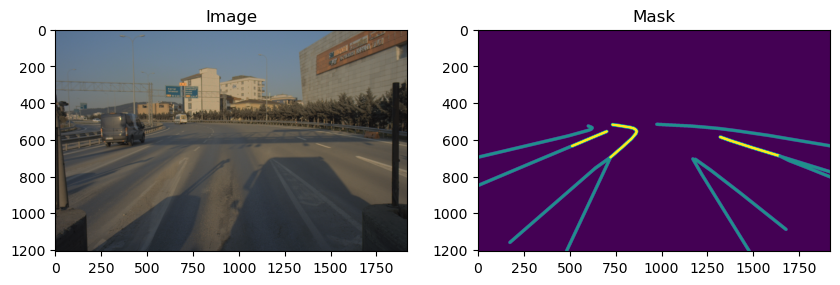

In [84]:
visualize_example_line_mask_pair(image_paths,line_mask_paths)

In [85]:
image=plt.imread(image_paths[4])
mask=plt.imread(mask_paths[4])

In [86]:
print(f"Shape of the mask: {mask.shape}")
print(f"Shape of the images: {image.shape}")

Shape of the mask: (1208, 1920)
Shape of the images: (1208, 1920, 3)


# Preprocessing 

### torchlike_data() method

In [87]:
image=plt.imread(image_paths[0])

In [88]:
image_before_torchlike=image
print(f"Image shapes before torchlike_data() method {image_before_torchlike.shape}")

Image shapes before torchlike_data() method (1208, 1920, 3)


In [89]:
torch_like_data_example=preprocess.torchlike_data(image)

In [90]:
print(f"Image shapes before torchlike_data() method {torch_like_data_example.shape}")

Image shapes before torchlike_data() method (3, 1208, 1920)


We can see that at first our image has HeightxWidthxShape data format. Pytorch wants our images as ChannelxHeightxWidth format.

### onehot_encoder() method

One hot encoding is a method that provides us to convert categorical data into vectors. Fro now we have 2 categorical value wihich is pixel belong to freespace or not.

Returns a matrix containing as many channels as the number of unique values ​​in the input Matrix, where each channel represents a unique class.

In [91]:
example_mask=plt.imread(mask_paths[3])
one_hot_encoded=preprocess.one_hot_encoder(example_mask,n_class=2)

In [92]:
print(f"The dimensions of one hot encoded mask is {one_hot_encoded.shape}")

The dimensions of one hot encoded mask is (1208, 1920, 2)


## tensorize_image method

In [93]:
tensorized_images=preprocess.tensorize_image(image_paths,(224,224))

In [94]:
tensorized_images[0].shape

torch.Size([3, 224, 224])

In [95]:
tensorized_images[0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

## tensorize_mask.() method

In [96]:
tensorized_masks=preprocess.tensorize_mask(mask_paths,(constant.HEIGHT,constant.WIDTH),n_class=2)

In [97]:
tensorized_masks.shape

torch.Size([14, 2, 224, 224])

In [98]:
tensorized_masks[3]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

## Model

In [99]:
model=Unet(in_channels=3,out_channels=2)

In [100]:
outputs=model.forward(tensorized_images)

In [101]:
outputs[0].shape

torch.Size([2, 224, 224])

In [102]:
tensorized_images.shape

torch.Size([14, 3, 224, 224])

In [103]:
outputs[5]

tensor([[[ 0.1486,  0.1559,  0.1571,  ...,  0.1588,  0.1511,  0.1102],
         [ 0.1535,  0.1898,  0.1656,  ...,  0.1618,  0.1776,  0.1452],
         [ 0.1593,  0.1801,  0.1655,  ...,  0.1562,  0.1720,  0.1299],
         ...,
         [ 0.1158,  0.1256,  0.1353,  ...,  0.1211,  0.1421,  0.1110],
         [ 0.1206,  0.1402,  0.1378,  ...,  0.1271,  0.1463,  0.1206],
         [ 0.1356,  0.1607,  0.1608,  ...,  0.1606,  0.1726,  0.1242]],

        [[-0.0533, -0.0888, -0.0781,  ..., -0.0788, -0.0719, -0.0543],
         [-0.0474, -0.0762, -0.0478,  ..., -0.0359, -0.0451, -0.0250],
         [-0.0394, -0.0774, -0.0523,  ..., -0.0511, -0.0626, -0.0146],
         ...,
         [-0.0478, -0.0748, -0.0602,  ..., -0.0471, -0.0632, -0.0063],
         [-0.0314, -0.0582, -0.0447,  ..., -0.0435, -0.0621, -0.0273],
         [-0.0216, -0.0448, -0.0433,  ..., -0.0583, -0.0649, -0.0299]]],
       grad_fn=<SelectBackward0>)